## 학습목표
- 네이버 블로그 데이터 수집하기
- 네이버 카페 데이터를 수집했던 경험을 통하여 동일한 프로세스로 블로그 글 수집하기
- 수집 후에 워드 클라우드 생성

#### 실습순서
1. "음식물 처리기 사용 후기" 검색결과를 블로크 링크 분석
2. 키워드 검색과 기간설정(6개월)이 가능한 url 생성
3. 드라이버 통해서 페이지 요청
4. 스크롤 내리기 (10번)
5. 블로그 주소 수집 (href_list)
6. 블로그 접근하여 본문 수집 (iframe)
7. 전체 코드 통합
8. 텍스트 데이터 txt 파일로 저장
9. 텍스트 전처리
10. 워드클라우드 생성

In [41]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from kiwipiepy import Kiwi
from wordcloud import WordCloud as wc
from collections import Counter
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [2]:
# 문자열 전처리 함수 -> 숫자, 문자, (?,!,) 제외하고 공백으로 대체
def preprocess_sentence_kr(w):
    w = w.strip()
    w = re.sub(r"[^0-9가-힣?.!,]+"," ", w)
    w = w.strip()
    return w

In [3]:
from urllib.parse import quote

In [4]:
keyword = quote("음식물 처리기")

In [5]:
keyword

'%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0'

In [6]:
date_option = "6m"

In [7]:
url = f"https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso=so%3Ar%2Cp%3A{date_option}"

In [8]:
url

'https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0&sm=tab_opt&nso=so%3Ar%2Cp%3A6m'

In [9]:
driver = wb.Chrome()

In [10]:
driver.get(url)

In [11]:
scroll = driver.find_element(By.TAG_NAME,'body')

In [13]:
for i in range(10):
    scroll.send_keys(Keys.END)
    time.sleep(1)

In [19]:
link = driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1.yEnIcjNmMJN3_9CrNfSS')

In [20]:
href_list = [l.get_attribute('href') for l in link]

In [21]:
len(href_list)

300

In [58]:
href_list[0]

'https://blog.naver.com/djusti/224156408404'

In [22]:
driver.get(href_list[0])

In [23]:
driver.switch_to.frame('mainFrame')

In [ ]:
driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text

In [ ]:
preprocess_sentence_kr(driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text)

In [26]:
f = open("./data/음식물 처리기 블로그 리뷰.txt","w")

for l in tqdm(href_list):
    driver.get(l)
    driver.switch_to.frame('mainFrame')
    text = driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text
    content = preprocess_sentence_kr(text)
    f.write(content)
f.close()

100%|███████████████████████████████████████████████████████████████████████████████████████| 300/300 [13:44<00:00,  2.75s/it]


In [27]:
f = open("./data/음식물 처리기 블로그 리뷰.txt","r")
word = f.readline()
f.close()

In [28]:
kiwi = Kiwi()

In [29]:
token = kiwi.tokenize(word)

In [30]:
nn_list = [t.form for t in token if t.tag in ['NNG','NNP']]

In [31]:
counter = Counter(nn_list)

In [32]:
top_100 = counter.most_common(100)

In [33]:
from PIL import Image
import numpy as np

In [50]:
mask = np.array(Image.open('./data/pika2.jpg'))

In [54]:
from wordcloud import WordCloud as wc

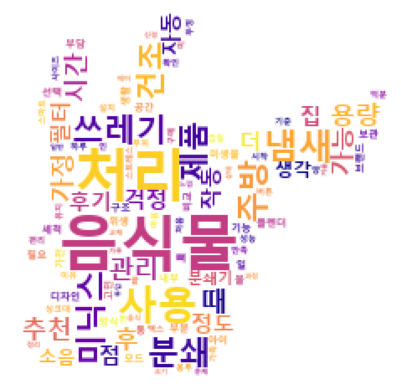

In [56]:
wc = wc(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white' ,
    mask = mask,
    colormap = "plasma"
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()